This Exercise performs some basic Text Processing on the Last 2 Presidential debates between President Trump and Joe Biden.<br>It involves scraping the data and performing some text-preprocessing tasks to understand more about the words spoken by these two Aspirants, during the 2020 Presidential Debates.

[Debate_1](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020)

[Debate_2](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from PIL import Image
import nltk
from nltk import word_tokenize
nltk.download('stopwords') # For stopwords removal
nltk.download('punkt')  # for tokenization
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer  # To lemmatize sentences
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import spacy
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import string 
import math                                                                                                                                                      
print('All Imported!')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


All Imported!


In [2]:
debate_1 = "https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020"
debate_2 = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp'

We need to scrape the data containing the texts from both debates.
Lets define a method that uses beautiful soup to parse the text data and returns two lists, of the interactions of both Trump and Biden.

In [3]:
def scrape_parse(link):
    """Scrape and preprocess text from rev.com,
        For Trump/Biden Presidential Debates
    
    @param,link: URL link to the website(rev.com)
    @return: Two lists (trump and biden)
    """
    source = requests.get(link).text
    soup = BeautifulSoup(source)
    texts = soup.findAll('p')
    corpus = [txt.text for txt in texts]

    if len(link) > 100:
        trump_corpus = [i for i in corpus if i.startswith('Donald')]
        biden_corpus = [i for i in corpus if i.startswith('Joe')]
        moderator = [i for i in corpus if i.startswith('Kristen')]

        # Now we remove their names from start of each sentence
        trump_speech_list = [i[22:] for i in trump_corpus]
        biden_speech_list = [i[19:] for i in biden_corpus]
        moderator = [i[24:] for i in moderator]
        
    else:
        trump_corpus = [i for i in corpus if i.startswith('President')]
        biden_corpus = [i for i in corpus if i.startswith('Vice')]
        moderator = [i for i in corpus if i.startswith('Chris')]

        # Now we remove their names from start of each sentence
        trump_speech_list = [i[35:] for i in trump_corpus]
        biden_speech_list = [i[34:] for i in biden_corpus]
        moderator = [i[23:] for i in moderator]
        
    return trump_speech_list, biden_speech_list, moderator

In [4]:
# getting the list of speeches from the first debate
trump_debate_1, biden_debate_1, chris_corpus = scrape_parse(debate_1)

In [5]:
# getting the list of speeches for the second debate
trump_debate_2, biden_debate_2, kristen_corpus = scrape_parse(debate_2)

Let's create a combined, raw, unfiltered corpus of both candidates sentences, we shall use later for sentiment analysis

In [6]:
trump_total_raw_corpus = trump_debate_1 + trump_debate_2
biden_total_raw_corpus = biden_debate_1 + biden_debate_2

Let's make these Trump and Biden speeches nltk text objects

In [7]:
trump_1 = nltk.Text(trump_debate_1)
trump_2 =  nltk.Text(trump_debate_2)
print(type(trump_1))

<class 'nltk.text.Text'>


In [8]:
biden_1 = nltk.Text(biden_debate_1)
biden_2 = nltk.Text(biden_debate_2)
print(type(biden_1))

<class 'nltk.text.Text'>


<h3>1. Let's see the percentage of times each person took the stage</h3>

In [9]:
first = {'Trump':[len(trump_debate_1)], 'Biden':[len(biden_debate_1)]}
second = {'Trump':[len(trump_debate_2)], 'Biden':[len(biden_debate_2)]}
first_df = pd.DataFrame(first)
second_df = pd.DataFrame(second)

In [10]:
# Let's make each a percent
total_stage1 = len(trump_debate_1 + biden_debate_1)
total_stage2 = len(trump_debate_2 + biden_debate_2)

# Let's use apply and lambda
first_df = first_df.apply(lambda x: round(x / total_stage1, 2))
second_df = second_df.apply(lambda x: round(x / total_stage2, 2))

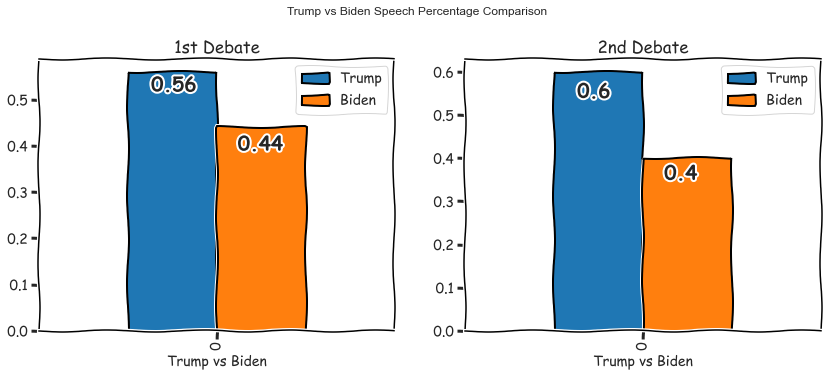

In [11]:
sns.set_style('ticks')
fig = plt.figure(figsize=(14,5)) # create figure
plt.suptitle('Trump vs Biden Speech Percentage Comparison', y=1.025)

plt.xkcd()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

first_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('1st Debate')
ax0.set_xlabel('Trump vs Biden')
ax0.annotate(str(first_df.loc[0,'Trump']), (-0.185, 0.518), fontsize=20, fontweight='bold')
ax0.annotate(str(first_df.loc[0,'Biden']), (0.059, 0.39), fontsize=20, fontweight='bold')

second_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax1)
plt.title('2nd Debate')
plt.xlabel('Trump vs Biden')
ax1.annotate(str(second_df.loc[0,'Trump']), (-0.185, 0.54), fontsize=20, fontweight='bold')
ax1.annotate(str(second_df.loc[0,'Biden']), (0.06, 0.35), fontsize=20, fontweight='bold')


plt.show()

#plt.rcdefaults()  # to stop xkcd plots

In [12]:
print(f'Trump spoke {len(trump_debate_1)} times in debate one and {len(trump_debate_2)} times in two.')
print(f'Biden spoke {len(biden_debate_1)} times in debate one and {len(biden_debate_2)} times in two.')

Trump spoke 314 times in debate one and 193 times in two.
Biden spoke 250 times in debate one and 131 times in two.


Let's clean the texts and remove punctuations and stopwords

In [13]:
def tokenize_words(corpus):
    """This method converts a sentence into
        text tokens or grouped sequence of characters
        
        @param corpus: Is a text document of multiple sentences
        @return: A list of tokenized words
    """
    word_list = []
    for sentence in corpus:
        word_list += word_tokenize(sentence)
    return word_list

In [14]:
def remove_punctuations(corpus):
    """This method removes punctuations from the
        sentences in a corpus
        
        @param corpus: Is a text document of multiple sentences
        @return: A list of words rid of punctuations
    """
    word_list = tokenize_words(corpus)
    words_noPunct = [i for i in word_list if i not in string.punctuation]
    return words_noPunct

In [15]:
def remove_stopwords(corpus):
    """This takes a corpus of sentences and by default,
        it removes punctuations, and removes stopwords
        
        @param: corpus is a document containing sentences
        @return: A list of words with no punctuation/stopwords
    """
    word_list = remove_punctuations(corpus)
    words_cleaned = [i for i in word_list if i not in stopwords.words('english')]
    return words_cleaned

For Trump...

In [16]:
trump_1 = remove_stopwords(trump_1)
trump_2 = remove_stopwords(trump_2)
trump_total_words = trump_1 + trump_2

# Now make these nltk text objects
trump_1 = nltk.text.Text(trump_1)
trump_2 = nltk.text.Text(trump_2)
trump_total_words = nltk.text.Text(trump_total_words)

print(f'Trump total words is {len(trump_total_words)}')

Trump total words is 9209


For Biden...

In [17]:
biden_1 = remove_stopwords(biden_1)
biden_2 = remove_stopwords(biden_2)
biden_total_words = biden_1 + biden_2

# Now make these nltk text objects
biden_1 = nltk.text.Text(biden_1)
biden_2 = nltk.text.Text(biden_2)
biden_total_words = nltk.text.Text(biden_total_words)
print(f'Biden total words is {len(biden_total_words)}')

Biden total words is 7936


<h3>2. Let's check the Lexical-richness or Diversity of the words spoken by Trump and Biden</h3>

In [18]:
def vocab(text):
    """find the unique tokens or vocab,
    In a given text object
    """
    vocabulary = list(set(text))
    return vocabulary

print(f'Trump\'s unique words are {len(vocab(trump_total_words))}')
print(f'Biden\'s unique words are {len(vocab(biden_total_words))}' )

Trump's unique words are 1894
Biden's unique words are 2020


In [19]:
def lexical_diversity(text):
    """find the ratio of the vocabulary to,
        total tokens in the text.
    """
    vocabulary = vocab(text)
    return round(len(vocabulary)/len(text), 2)

In [20]:
# For the word-count comparison
word_count_df = pd.DataFrame(columns=['Word_Count'], index=['Trump', 'Biden'])

for index, row in word_count_df.iterrows():
    if index is 'Trump':
        row['Word_Count'] = len(trump_total_words)
    else:
        row['Word_Count'] = len(biden_total_words)

# For the lexical diversity comparison
lex_var_df = pd.DataFrame(columns=['Lexical-Diversity'], index=['Trump', 'Biden'])

for index, row in lex_var_df.iterrows():
    if index is 'Trump':
        row['Lexical-Diversity'] = lexical_diversity(trump_total_words)
    else:
        row['Lexical-Diversity'] = lexical_diversity(biden_total_words)
lex_var_df

Lexical-Diversity
Trump              0.21
Biden              0.25

In [21]:
word_count_df

Word_Count
Trump       9209
Biden       7936

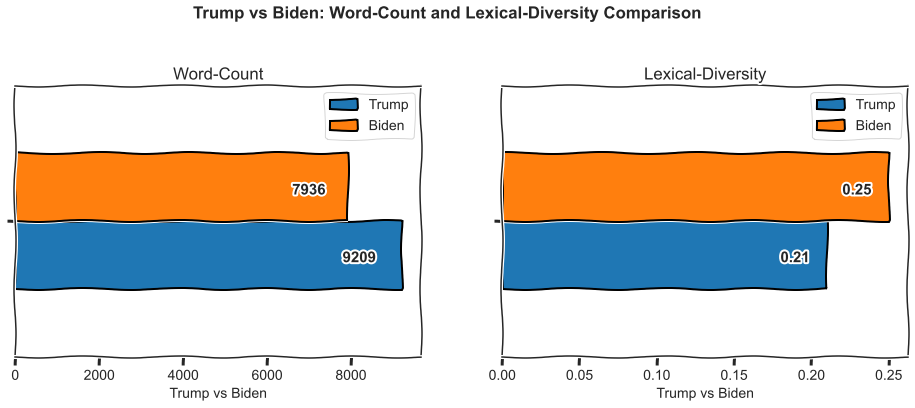

In [22]:
sns.set_style('ticks')
fig = plt.figure(figsize=(16,5)) # create figure
plt.suptitle('Trump vs Biden: Word-Count and Lexical-Diversity Comparison', y=1.1, fontweight='bold')

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

word_count_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('Word-Count')
ax0.set_xlabel('Trump vs Biden')
ax0.set_yticklabels('')
ax0.annotate(str(word_count_df.loc['Biden','Word_Count']), (6600, 0.099), fontsize=15, fontweight='bold')
ax0.annotate(str(word_count_df.loc['Trump','Word_Count']), (7800, -0.15), fontsize=15, fontweight='bold')

lex_var_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax1)
plt.title('Lexical-Diversity')
plt.xlabel('Trump vs Biden')
ax1.set_yticklabels('')
ax1.annotate(str(lex_var_df.loc['Biden','Lexical-Diversity']), (0.22, 0.099), fontsize=15, fontweight='bold')
ax1.annotate(str(lex_var_df.loc['Trump','Lexical-Diversity']), (0.18, -0.15), fontsize=15, fontweight='bold')

plt.show()

1. Trump utters a total 9209 words(rid of stopwords and punctuations) comprising of 1894 unique words, giving a Lexical-Richness score of 21%.

2. Biden utters a total 7941 words(rid of stopwords and punctuations) comprising of 2020 unique words, giving a Lexical-Richness score of 25%.

3. Know that in both debates Trump utters more words than Biden in a ratio of roughly (56:44) in first debate and (59:41) in second debate.


<h3>3. TFIDF for both Presidential Candidates</h3>

So what are the candidates even talking about, are there any relatively unique areas to each candidate, as deductible from the words spoken at these debates?... Let's find out using TFIDF.

In [23]:
# First let's lemmatize the words to achieve a similar base “stem” for a word

def lemmatize_words(word_list):
    lemma = WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(i) for i in word_list]
    
    return lemmatized

In [24]:
trump_lemma = lemmatize_words(trump_total_words)
biden_lemma = lemmatize_words(biden_total_words)

Next, we create a simple TFIDF class for the documents

In [25]:
class Tfidf(object):
    """instantiate a Tfidf object to compute TF-IDF scores
        across a corpus of text documents.
    """
    def __init__(self, docs, doc_names):
        self.docs = docs
        self.doc_names = doc_names
        
    def _tf(self, word, doc):
        lenOfDoc = len(doc)
        if lenOfDoc < 1: return 0
        else: return doc.count(word) / lenOfDoc

    def _contains(self, word, docs):
        return sum(1 for doc in docs if word in doc)

    def _idf(self, word, docs):
        docsCount = self._contains(word, docs)
        if docsCount < 1 : return 0
        else: return math.log(len(docs) / docsCount)

    def tfidf(self):
        print('-----------------------------------------------------------')
        master = {}
        for i, doc in enumerate(docs):
            print("Top words in document {}".format(doc_names[i]))
            master[doc_names[i]] = {}
            scores = {word: (self._tf(word,doc) * self._idf(word, docs)) for word in doc}
            sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            for word, score in sorted_words[:10]:
                print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
                master[doc_names[i]][word] = [round(score, 6)]
            print()
        return master

In [26]:
# Let's instantiate a Tfidf class object
docs = [trump_lemma, biden_lemma]
doc_names = ['Trump-Corpus', 'Biden-Corpus']

text_docs = Tfidf(docs, doc_names)

In [27]:
# Let's get the TFIDF summary for Trump and Biden
tfidf_summary = text_docs.tfidf()

-----------------------------------------------------------
Top words in document Trump-Corpus
	Word: ago, TF-IDF: 0.00128
	Word: Chris, TF-IDF: 0.00098
	Word: built, TF-IDF: 0.00098
	Word: nobody, TF-IDF: 0.0009
	Word: gave, TF-IDF: 0.0009
	Word: called, TF-IDF: 0.0009
	Word: cage, TF-IDF: 0.00083
	Word: disaster, TF-IDF: 0.00075
	Word: individual, TF-IDF: 0.00068
	Word: mandate, TF-IDF: 0.00068

Top words in document Biden-Corpus
	Word: create, TF-IDF: 0.00096
	Word: folk, TF-IDF: 0.00087
	Word: federal, TF-IDF: 0.00087
	Word: serious, TF-IDF: 0.00079
	Word: running, TF-IDF: 0.0007
	Word: situation, TF-IDF: 0.0007
	Word: Americans, TF-IDF: 0.0007
	Word: lie, TF-IDF: 0.00061
	Word: God, TF-IDF: 0.00061
	Word: someone, TF-IDF: 0.00061



Let's see the dictionary of top 10 TFIDF words from Trump and Biden

In [28]:
tfidf_summary

{'Trump-Corpus': {'ago': [0.00128],
  'Chris': [0.000978],
  'built': [0.000978],
  'nobody': [0.000903],
  'gave': [0.000903],
  'called': [0.000903],
  'cage': [0.000828],
  'disaster': [0.000753],
  'individual': [0.000677],
  'mandate': [0.000677]},
 'Biden-Corpus': {'create': [0.000961],
  'folk': [0.000873],
  'federal': [0.000873],
  'serious': [0.000786],
  'running': [0.000699],
  'situation': [0.000699],
  'Americans': [0.000699],
  'lie': [0.000611],
  'God': [0.000611],
  'someone': [0.000611]}}

Let's create a DataFrame from these dicts and also prepare for the word-cloud

In [29]:
biden_tfidf = pd.DataFrame(tfidf_summary['Biden-Corpus']).T
biden_tfidf.columns = ['Val']
biden_tfidf.head()

Val
create   0.000961
folk     0.000873
federal  0.000873
serious  0.000786
running  0.000699

In [30]:
trump_tfidf = pd.DataFrame(tfidf_summary['Trump-Corpus']).T
trump_tfidf.columns = ['Val']
trump_tfidf.head()

Val
ago     0.001280
Chris   0.000978
built   0.000978
nobody  0.000903
gave    0.000903

Next, let's define a method that iterates through the data frames and returns a list of words multiplied by their weights for the word-cloud

In [31]:
def find_cloud_list(df):
    """This method converts the TFIDF values in a DataFrame
        to a word list as a percentage of total values
        
        @param df: A DataFrame of TFIDF values
        @return: A list of processed values
    """
    df['Pct'] = df['Val'].apply(lambda x: x * 100000)
    df['Pct'] = round((df['Pct'].apply(lambda x: x / sum(df.Pct)))*100, 2)

    master_list = []

    for index, row in df.iterrows():
        y = (index+',') * int(row['Pct'])
        x = y.split(',')[:-1]
        master_list.extend(x)
    
    return master_list

In [32]:
trump_cloud_list = find_cloud_list(trump_tfidf)
biden_cloud_list = find_cloud_list(biden_tfidf)

Plotting the word-cloud objects

In [33]:
def plot_word_cloud(text_list, color):
    """This method plots a word-cloud object 
        
        @param text_list: A list of processed numerical values
        @return: None ('it just plots the word-cloud object')
    """
    strr = ''
    for i in text_list:
        if type(i) is not str:
            i = i[0]
        strr+=i
        strr+=','

    # Instantiate the word-cloud object
    wc = WordCloud(background_color=color, max_words=len(strr))

    # Generate the word-cloud object
    wc.generate(strr)

    # plot the word-cloud
    fig = plt.figure()
    fig.set_figwidth(14) # set width
    fig.set_figheight(18) # set height

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Let's see Trump's TFIDF word-cloud

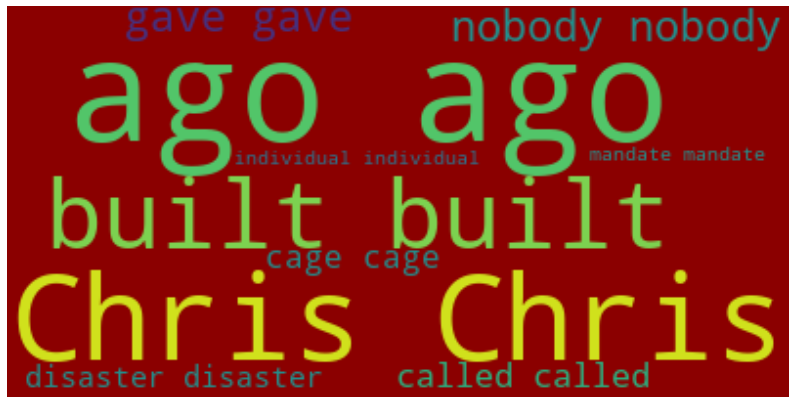

In [34]:
plot_word_cloud(trump_cloud_list, 'darkred')

Let's see Biden's TFIDF word-cloud

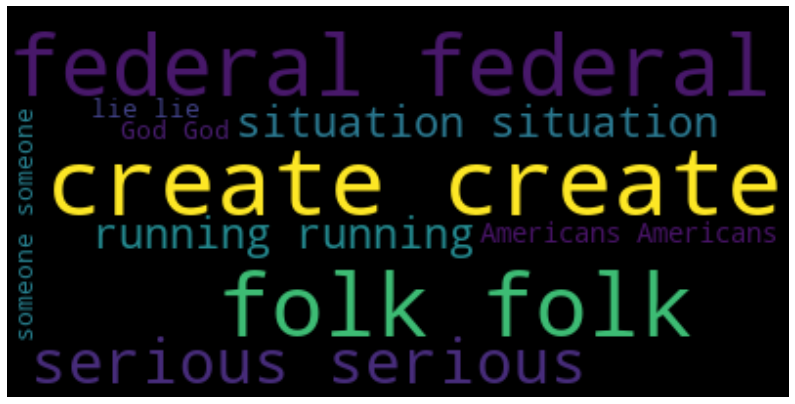

In [35]:
plot_word_cloud(biden_cloud_list, 'black')

<h3>4. Some Questions Asked...</h3>

Let's look at some of the questions thrown by the moderators Chris Wallace(1st debate) and Kristen Welker(2nd debate)... As well as some of the responses from Trump and Biden.


We can see from both debates that some of the queestions raised by Chris Wallace, bordered on
1. Supreme Court
2. Obama-care
3. Economy
4. Race / Justice
5. Law Enforcement
6. Election Integrity
7. COVID

While Kristen covered topics like
1. COVID
2. National Security
3. America / American Families
4. Minimum-wage
5. Immigration
6. Race / Black-Lives-Matter
7. leadership

Let's change the sentences spoken by Trump and Biden, to lower-case, so as to perform some sentiments analysis

In [36]:
# 1. make all sentences lower
biden_total_raw_corpus = [i.lower() for i in biden_total_raw_corpus]
trump_total_raw_corpus = [i.lower() for i in trump_total_raw_corpus]

<h3>5. Sentiment-Analysis with Microsoft Azure-SDK:</h3>

First import credentials and required modules from Azure, including the authenticated TextAnalyticsClient

In [37]:
from _text_analytics_keys import client 
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

Next, we define a Sentiment-Analysis function that takes the client and the speech sentences. 

In [38]:
def sentiment_analysis(client, docs):
    """This method applies AzureML sentiments analysis
        to processed text documents
        
        @param client: the AzureML TextAnalyticsClient
        @param docs: A list of a single long text
        @return: A dictionary of sentences and sentiments
    """
    
    response = client.analyze_sentiment(documents=docs)[0]
    sent_dict = {'Sentence':[], 'Sentiment':[], \
                 'Overall_Score':{'Positive':response.confidence_scores.positive, \
                                 'Neutral':response.confidence_scores.neutral, \
                                 'Negative':response.confidence_scores.negative}}
    
    for idx, sentence in enumerate(response.sentences, 1):
        sent_dict['Sentence'].append(sentence.text)
        sent_dict['Sentiment'].append(sentence.sentiment)
        
    return sent_dict


Next, we define a function to extract key phrases from sentences we select, using the TextAnalyticsClient

In [39]:
def key_phrase_extraction(client, docs):
    """This method applies AzureML key_phrase_extraction
        to extract key phrases from text documents
        
        @param client: the AzureML TextAnalyticsClient
        @param docs: A list of a single long text
        @return: A list of key phrases
    """
    

    try:
        response = client.extract_key_phrases(documents = docs)[0]
        
        master_list = []
        strr = ''
        if not response.is_error:
            for phrase in response.key_phrases:
                strr+=phrase
                strr+=', '
            master_list.append(strr[:-2])
                
        else:
            print(response.id, response.error)

    except Exception as err:
        print("Encountered exception. {}".format(err))
        
    return master_list

Then we also define a search-corpus function that finds sentences based on the words and corpus we pass to it.

In [40]:
def search_corpus(word_list, corpus):
    """This method searches for sentences in a corpus,
        based on the word-list. 
    
    @param: word_list, a list of words to search on
    @param: corpus a corpus of sentences stored in a list
    @return: A list of a single string of searched sentences combined.
    """
    _list = []
    for word in word_list:
        _list.extend([i for i in corpus if word in i])
    
    sent = ''
    master_list = []
    for sentence in _list:
        sent+=sentence
        if len(sent) >= 4000:
            master_list.append([sent])
            sent = ''
    master_list.append([sent])
    
    return master_list

Next, we define a function that converts the dictionary from the sentiment function to a data frame for more analysis

In [41]:
def sentiments_to_df(sentiments_dict_list):
    """This method takes the list of dict objects 
        returned from the sentiment-analysis function 
        and creates a DataFrame with it.
    
        @param: sentiments_dict is a dictionary
        @return: returns a dataframe and a dictionary
                of overall sentiment scores per query
    """

    df = None
    for i in range(len(sentiments_dict_list)):
        x = sentiments_dict_list[i]
        if df is None:
            total = x['Overall_Score']
            del x['Overall_Score']
            df = pd.DataFrame(x)
        else:
            y = x['Overall_Score']
            for key, val in y.items():
                total[key] += val
            del x['Overall_Score']
            idf = pd.DataFrame(x)
            df = pd.concat([df, idf], ignore_index=True)
            
    for key, val in total.items():
        total[key] = [round(val/len(sentiments_dict_list), 3)] 

    return df, total

Next, we define the apply sentiments and extractions function that applies the search, sentiments and extraction functions for each search query 

In [42]:
def apply_sentiments_and_extractions(word_list, corpus):
    """This method applies the sentiments analysis and
        key-phrase-extraction methods to a corpus based
        on a list of words searched on.
        
        @param word-list: A list of words for the 
                    search corpus function
        @param corpus: A list of multiple text sentences
        @return: A DataFrame and a dictionary of total sentiments
    """
    
    searched = search_corpus(word_list, corpus)
    sentiments = [sentiment_analysis(client, i) for i in searched]
    df, total_sentiments = sentiments_to_df(sentiments)
    
    # To extract Key-phrases for each sentence in df
    for i in range(len(df)):
        sentence = [df.loc[i, 'Sentence']]
        df.loc[i, 'Key-phrases'] =  key_phrase_extraction(client, sentence)
    
    return df, total_sentiments

Finally, for sentiments and Phrase-extraction, we define the plot sentiments function that plots each sentiment summary as a pie chart.

In [43]:
def plot_sentiments(biden, trump, title, colours):
    """This method plots double pie-charts for the
        sentiments analysis function of both candidates.
        
        @param biden: A dictionary of Biden's sentiments per query
        @param trump: A dictionary of Trump's sentiments per query
        @return: None (just plots the double pie-charts)
    """
    
    biden = pd.DataFrame(biden).T
    biden.columns = ['total']
    trump = pd.DataFrame(trump).T
    trump.columns = ['total']

    
    sns.set_style('ticks')
    fig = plt.figure(figsize=(16,8)) # create figure
    plt.suptitle(f'Trump vs Biden: Sentiments-Analysis-Summary on {title}', y=1.1, fontweight='bold')

    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

    
    colors_list = colours
    explode_list = [0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

    biden['total'].plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, 
                     pctdistance= 1.12,
                     colors=colors_list,
                     explode=explode_list,
                   ax=ax0)

    # Let's scale the title up to match the pctdistance too

    ax0.set_title('Biden Sentiments-Analysis Summary', y=1.12)
    ax0.axis('equal')  # This sets the Pie chart to look like a perfect circle
    ax0.legend(labels=biden.index, loc='upper left')
    
    trump['total'].plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, 
                     pctdistance= 1.12,
                     colors=colors_list,
                     explode=explode_list,
                   ax=ax1)
    ax1.set_title('Trump Sentiments-Analysis Summary', y=1.12)
    ax1.axis('equal')  # This sets the Pie chart to look like a perfect circle
    ax1.legend(labels=trump.index, loc='upper right')

    plt.show()

    
    

<h3> 6. Parts-Of-Speech-Tagging with Spacy:</h3>
    
Let's define the Parts-Of-Speech function with SpaCY that will return the counts of unique parts of speech per query

In [44]:
def parts_of_speech_tagging(key_phrases_df):
    """This method takes a DataFrame with a column
        of key-phrases per Candidate, per query and 
        computes the POS tags for each phrase
        
        @param:key_phrases is a DataFrame with a 
                column of Key-phrass
        @return: A dict with each POS tag as key and
                count per tag as value
    """
    listt = list(key_phrases_df['Key-phrases'])
    tags_list = []
    
    # instantiate a spaCY load object
    sp = spacy.load('en_core_web_sm')
    
    # Now iterate through listt and append tags
    for key_phrase in listt:
        if type(key_phrase) is not str:
            key_phrase = key_phrase[0]
        
        if key_phrase is not '':
            sen = sp(key_phrase)
            for i in range(1000):
                try:
                    tags_list.append(sen[i].pos_)
                except:
                    break

    return dict(Counter(tags_list))
    

<h3>QUEST 1:Trump and Biden sentiments and key phrases on Jobs and Wages</h3>

For Trump on Wages and Jobs...

In [45]:
word_list = ['job', 'wage', 'tax']
corpus = trump_total_raw_corpus

trump_jobs_df, trump_jobs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [46]:
trump_jobs_df.head(20)

Sentence Sentiment  \
0   you didn’t think we should have closed our cou...  negative   
1   you wouldn’t have closed it for another two mo...   neutral   
2   by my doing it early, in fact, dr. fauci said,...  positive   
3                          oh really, go take a look.   neutral   
4          the governors said i did a phenomenal job.  positive   
5                             most of them said that.   neutral   
6   in fact, people that would not be necessarily ...  positive   
7                                   we got the gowns.   neutral   
8                                   we got the masks.   neutral   
9                            we made the ventilators.   neutral   
10                you wouldn’t have made ventilators.   neutral   
11           and now we’re weeks away from a vaccine.   neutral   
12                  we’re doing therapeutics already.   neutral   
13         fewer people are dying when they get sick.  negative   
14                        far fewer people are dying.  negative   
15  we’ve done a great job.the only thing i haven’...  negative   
16                               it’s just fake news.  negative   
17  they give you good press, they give me bad pre...  negative   
18                     but let me just say something.   neutral   
19                                      i don’t care.  negative   

                                          Key-phrases  
0                                             country  
1                                            [months]  
2   [president trump, fauci, thousands of lives, d...  
3                                              [look]  
4                         [governors, phenomenal job]  
5                                                  []  
6     [president trump, phenomenal job, fact, people]  
7                                             [gowns]  
8                                             [masks]  
9                                       [ventilators]  
10                                      [ventilators]  
11                                   [weeks, vaccine]  
12                                     [therapeutics]  
13                                     [fewer people]  
14                                     [fewer people]  
15  [thing i, good job, fake news, matter, bad press]  
16                                        [fake news]  
17                       [bad press, good press, way]  
18                                                 []  
19                                                 []

In [47]:
trump_jobs_sentiments

{'Positive': [0.317], 'Neutral': [0.057], 'Negative': [0.627]}

In [48]:
len(trump_jobs_df)

167

For Biden on Wages and Jobs...

In [49]:
word_list = ['job', 'wage', 'tax']
corpus = biden_total_raw_corpus

biden_jobs_df, biden_jobs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [50]:
biden_jobs_df.head(20)

Sentence Sentiment  \
0           he told us what a great job xi was doing.  positive   
1   he said we owe him debt of gratitude for being...  negative   
2                            and what did he do then?   neutral   
3                                he then did nothing.   neutral   
4                    he waited and waited and waited.   neutral   
5   he still doesn’t have a plan.i know how to do ...   neutral   
6                 i know how to get the job done.yes.   neutral   
7   well, that’s what he’s going to try to do, but...  positive   
8                    their job doesn’t depend on him.   neutral   
9   they’re the people… and by the way-do i get my...   neutral   
10  the fact is that he has in fact, worked on thi...   neutral   
11          fewer jobs than when he became president.   neutral   
12  first one in american history.secondly, the pe...  negative   
13  those people who have been saving our lives, t...  positive   
14  people who’ve been putting themselves in the w...   neutral   
15  and the idea that he is insisting that we go f...  negative   
16                      why is he want to open it up?   neutral   
17  why does he take care of the… you can’t fix th...  negative   
18  and he has no intention of doing anything abou...   neutral   
19                           why aren’t schools open?  negative   

                                          Key-phrases  
0                                        great job xi  
1                                 [debt of gratitude]  
2                                                  []  
3                                                  []  
4                                                  []  
5                                         [plan, job]  
6                                               [job]  
7           [thousands of scientists, great hospital]  
8                                               [job]  
9                                 [way, people, time]  
10  [president, fact, office, fewer jobs, united s...  
11                            [fewer jobs, president]  
12            [people, american history, jobs, lines]  
13                                    [people, lives]  
14                                      [way, people]  
15  [covid cases, covid deaths, united states of a...  
16                                                 []  
17                      [economy, covid crisis, care]  
18  [health, terms, safety, schools, home, intention]  
19                                     [schools open]

In [51]:
len(biden_jobs_df)

157

In [52]:
biden_jobs_sentiments

{'Positive': [0.305], 'Neutral': [0.07], 'Negative': [0.625]}

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

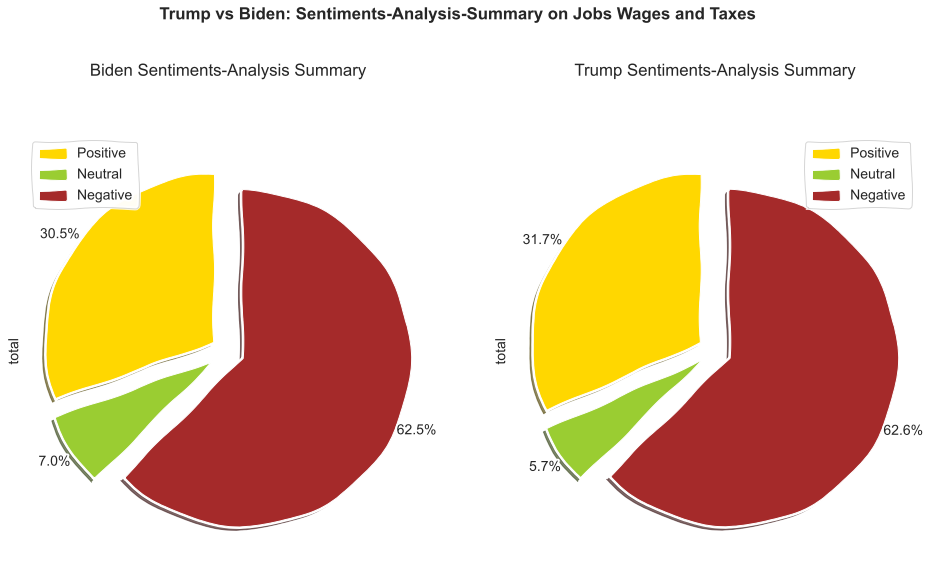

In [53]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Jobs Wages and Taxes'

plot_sentiments(biden_jobs_sentiments, trump_jobs_sentiments, title, colours)

**Plotting the Jobs and Wages Key-phrases word-cloud object**

Joe Biden Jobs-and-Wages word-cloud...

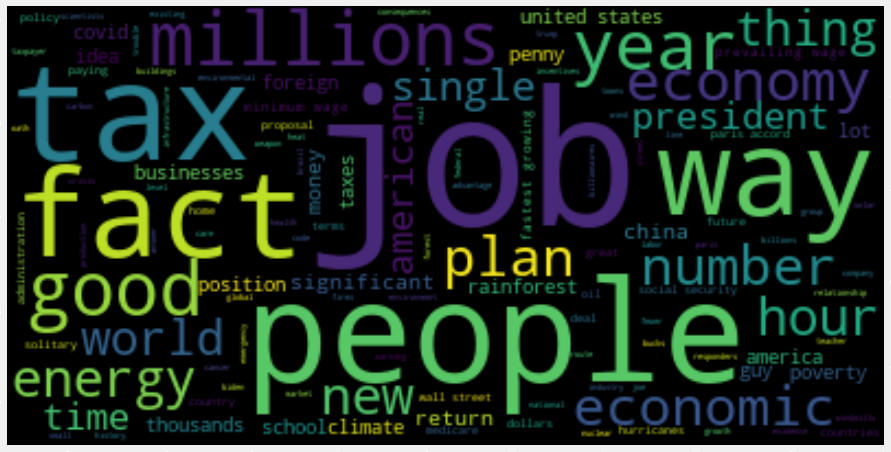

In [54]:
word_list = biden_jobs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

Donald Trump Jobs-and-Wages word-cloud...

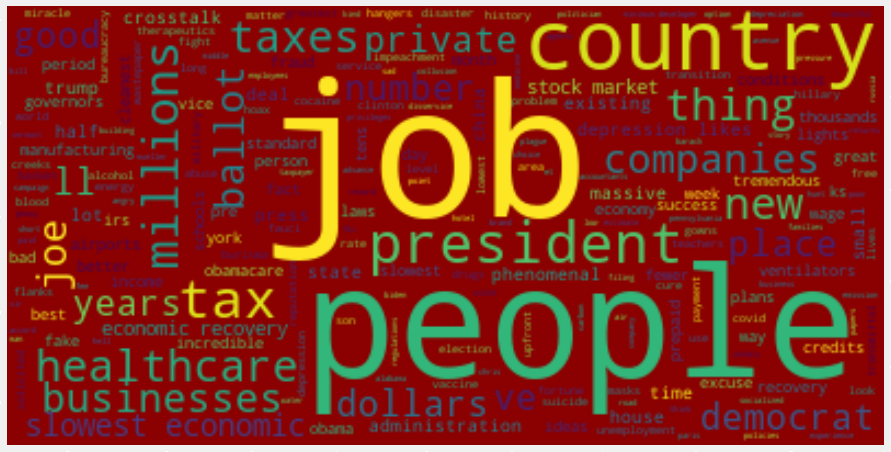

In [55]:
word_list = trump_jobs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

**Plotting the Jobs and Wages Point-Of-Speech-Tags bubble-plot object**

Let's define a method to normalize the data we shall use for the bubble-plot

In [56]:
def normalize_df(DataFrame):
    """Applies the min-max normalizer to
        each col of the data-frame to be 
        used for the bubble-plot
    """
    col_list = list(DataFrame.columns)
    
    for col in col_list:
        mini = min(DataFrame[col])
        maxi = max(DataFrame[col])
        DataFrame[col] = (DataFrame[col] - mini) / (maxi - mini)
        
    return DataFrame

Much of Data Science is about preparing data for each pipeline or library that requires the data in a specific way. So let's prepare the data we need to plot the bubble-plot.

In [57]:
def prepare_plot_bubble(trump_query_df, biden_query_df):
    """This method prepares the dataframes of
         Trump and Biden in preparation of the bubble plot,
         
         A bubble plot requires data in a specific format and
         chances are that both trump and Biden's DataFrames will 
         not be same size. This will cause issues in plotting. 
         So we must equalise and standardize the dataFrames.
        
        @param trump_query_df: A DataFrame of Trump's responses
        @param biden_query_df: A DataFrame of Biden's responses
        @return: A DataFrame prepared for the bubble-plot
    """
     
    
    trump_pos = parts_of_speech_tagging(trump_query_df)
    biden_pos = parts_of_speech_tagging(biden_query_df)
    
    if len(trump_pos) <= len(biden_pos):
        x, y = biden_pos.copy(), trump_pos.copy()
        col = ['Biden','Trump']
    else:
        x , y = trump_pos.copy(), biden_pos.copy()
        col = ['Trump','Biden']
        
        
    index = list(x.keys())
    columns = col
    
    xx = list(x.values())
    yy = [0] * len(xx)
    
    bubble_df = pd.DataFrame(columns=columns, index=index)
    bubble_df.iloc[:,0], bubble_df.iloc[:,1] = xx, yy
    
    for ind, row in bubble_df.iterrows():
        if ind not in y.keys():
            continue
        row[1] = y[ind]
        
    if 'PUNCT' in bubble_df.index:
        bubble_df = bubble_df.drop('PUNCT') 
        
    bubble_df = normalize_df(bubble_df)
    
    return bubble_df

Next, we define a method that plots the bubble_plot

In [58]:
def plot_bubble_plot(trump_query_df, biden_query_df, title):
    """This method plots a bubble-plot for Trump and Biden's responses
        
        @param trump_query_df: A dictionary of Trump's query responses
        @param biden_query_df: A dictionary of Biden's query responses
        @param title: The query title
        @return: None (just plots the bubble-plot)
    """
    
    bubble_df = prepare_plot_bubble(trump_query_df, biden_query_df)
    bubble_df['temp'] = list(range(1,len(bubble_df)+1))
    names_ = list(bubble_df.columns)

    #plt.rcdefaults()  # to stop xkcd plots
    ax0 = bubble_df.plot(kind='scatter',
                        x= names_[2],
                        y=names_[0],
                        figsize=(8, 4),
                        alpha=0.5,                  # transparency
                        color='red',
                        s=bubble_df[names_[0]] * 2000 + 10)  # pass in weights



    ax1 = bubble_df.plot(kind='scatter',
                         color='skyblue',
                         x=names_[2],
                         y=names_[1],
                         alpha= 0.5,
                         s= bubble_df[names_[1]] * 2000 + 10,
                         ax = ax0)

    ax0.set_ylabel('Value of POS-Tags', fontsize=10)
    ax0.set_title(f'Trump vs Biden: {title} POS-Tags Bubble-Plot')
    ax0.legend([names_[0], names_[1]], loc='upper right', fontsize='x-large')
    ax0.set_xlabel('POS-Tags')
    new_x_label = list(bubble_df.index)
    new_x_label.insert(0,'')
    new_x_label.append('')
    ax0.set_xticklabels(new_x_label, fontsize=10)
    
    plt.show()

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


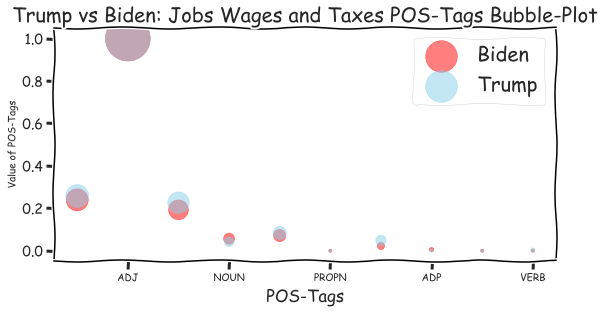

In [59]:
sns.set_style('ticks')
plt.xkcd()
title = 'Jobs Wages and Taxes'
plot_bubble_plot(trump_jobs_df, biden_jobs_df, title)

<h3>QUEST 2:Trump and Biden sentiments and key phrases on Racism</h3>

For Trump on Racism...

In [60]:
word_list = [' raci', 'race']  # This shoud cover racism, racial, racist and race
corpus = trump_total_raw_corpus

trump_racism_df, trump_racism_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [61]:
len(trump_racism_df)

47

In [62]:
trump_racism_df

Sentence Sentiment  \
0   if we would’ve listened to you, the country wo...  negative   
1                                 it’s china’s fault.  negative   
2                      it should have never happened.   neutral   
3   they stopped it from going in, but it was chin...  negative   
4   and, by the way, when you talk about numbers, ...  negative   
5      you don’t know how many people died in russia.  negative   
6       you don’t know how many people died in india.  negative   
7   they don’t exactly give you a straight count, ...   neutral   
8   but if you look at what we’ve done, i closed i...   neutral   
9   he’s a racist and he’s xenophobic,” because yo...  negative   
10      wait a minute.i ended it because it’s racist.  negative   
11  i ended it because a lot of people were compla...  negative   
12  that it a radical revolution that was taking p...   neutral   
13       and you know it, and so does everybody else.   neutral   
14  and he would know it- [crosstalk 00:33:02]if y...  negative   
15                         it was sort of a reversal.   neutral   
16  and if you look at the people, we were paying ...  negative   
17  and really, they were teaching people to hate ...  negative   
18             i’m not going to allow that to happen.   neutral   
19  we have to go back to the core values of this ...   neutral   
20  they were teaching people that our country is ...  negative   
21                               it’s a racist place.  negative   
22  and they were teaching people to hate our coun...  negative   
23  and i’m not going to allow that to happen.look...  negative   
24                       and that went on for months.   neutral   
25                  nancy pelosi said the same thing.   neutral   
26  she was dancing on the streets in chinatown, i...   neutral   
27  but when i closed, he said, “this is a terribl...  negative   
28       now he says i should have closed it earlier.   neutral   
29  joe, it doesn’t.well, you have to understand t...  negative   
30  “pigs in a blanket, fry them like bacon.” i sa...  negative   
31  and that was my first glimpse of black lives m...  negative   
32  as far as my relationships with all people, i ...  positive   
33  i am the least racist person in this room.… go...  negative   
34  it’s a very… makes me sad, because i am the le...  negative   
35                               i won that election.   neutral   
36  and if you look at crooked hillary clinton, if...  negative   
37          they came after me spying on my campaign.   neutral   
38  they started from the day i won, and even befo...  positive   
39  from the day i came down the escalator with ou...  negative   
40  they were a disgrace to our country, and we’ve...  negative   
41                             we’ve caught them all.   neutral   
42                          we’ve got it all on tape.   neutral   
43                             we’ve caught them all.   neutral   
44  and by the way, you gave the idea for the loga...   neutral   
45  you better take a look at that, because we cau...   neutral   
46             take a look at carolyn maloney’s race-   neutral   

                                          Key-phrases  
0                 millions of people, country, person  
1                                     [china’s fault]  
2                                                  []  
3                                     [china’s fault]  
4                       [way, numbers, people, china]  
5                                    [people, russia]  
6                                     [people, india]  
7                                    [straight count]  
8                                                  []  
9                                           [country]  
10                                           [minute]  
11                            [lot of people, things]  
12     [place, radical revolution, military, schools]  
13                                          

In [63]:
for index, row in trump_racism_df.iterrows():
    if 'racist' in row["Sentence"]: 
        pass

In [64]:
trump_racism_sentiments

{'Positive': [0.1], 'Neutral': [0.03], 'Negative': [0.87]}

For Biden on Racism...

In [65]:
word_list = [' raci', 'race']
corpus = biden_total_raw_corpus

biden_racism_df, biden_racism_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [66]:
len(biden_racism_df)

89

In [67]:
biden_racism_df.head(20)

Sentence Sentiment  \
0   … second point i’d make to you, is that when f...  negative   
1                                     what did he do?   neutral   
2   he came out of his bunker, had the military us...  negative   
3                  and then what happened after that?   neutral   
4   the bishop of that very church said that it wa...  negative   
5   the general who was with him said all he ever ...  negative   
6   this is a president who has used everything as...  negative   
7   he’s the racist.the fact is that there is raci...  negative   
8   people have to be made aware of what other peo...  negative   
9                         it’s important people know.   neutral   
10  many people don’t want to hurt other people’s ...  positive   
11  it makes a gigantic difference in the way a ch...  positive   
12  it’s a little bit like how this guy and his fr...   neutral   
13  they look down their nose on people like irish...   neutral   
14     they look down on people who don’t have money.  negative   
15  they look down on people who are of a differen...  positive   
16  they looked down on people who are a different...   neutral   
17                      in fact, we’re all americans.   neutral   
18  the only way we’re going to bring this country...  positive   
19  there’s nothing we cannot do, if we do it toge...   neutral   

                                          Key-phrases  
0   floyd, peaceful protest, white house, point i’...  
1                                                  []  
2      [military use tear gas, bunker, church, bible]  
3                                                  []  
4                          [church, bishop, disgrace]  
5                                   [people, general]  
6   [racists hatred, racist division, dog whistle,...  
7                        [fact, racial insensitivity]  
8                                            [people]  
9                                  [important people]  
10                [people’s feelings, big difference]  
11  [way, child, gigantic difference, sense of sel...  
12                             [guy, friends, people]  
13          [nose, people, irish catholics, scranton]  
14                                    [people, money]  
15                          [people, different faith]  
16                          [people, different color]  
17                                  [fact, americans]  
18                                     [way, country]  
19                                                 []

In [68]:
biden_racism_sentiments

{'Positive': [0.275], 'Neutral': [0.055], 'Negative': [0.67]}

Let's see the sentiments analysis plot for racism

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

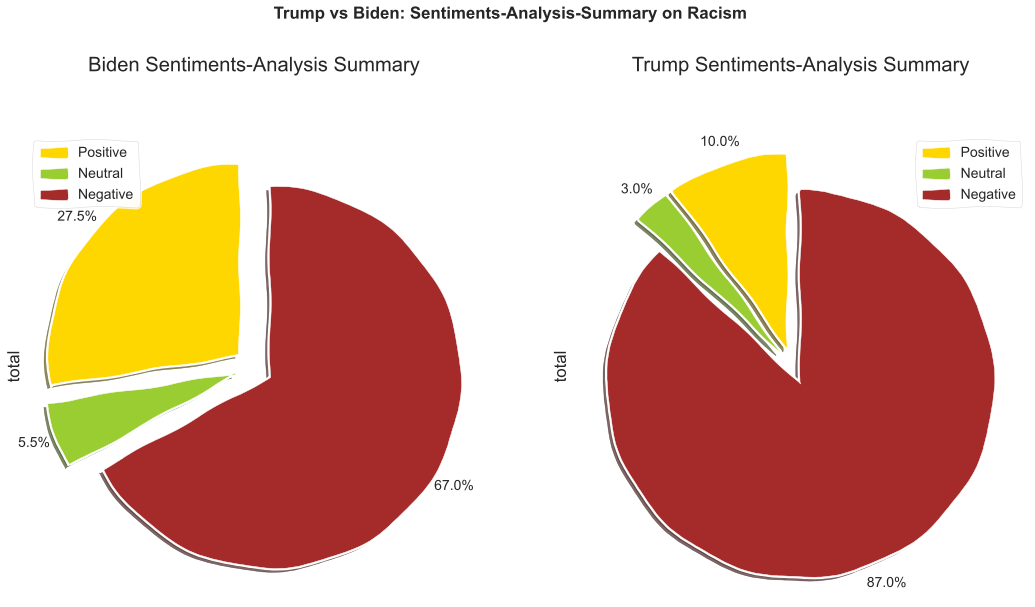

In [69]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Racism'
plt.xkcd()

plot_sentiments(biden_racism_sentiments, trump_racism_sentiments, title, colours)

Let's see Joe Biden's racism word-cloud of Key-Phrases he used in addressing racism...

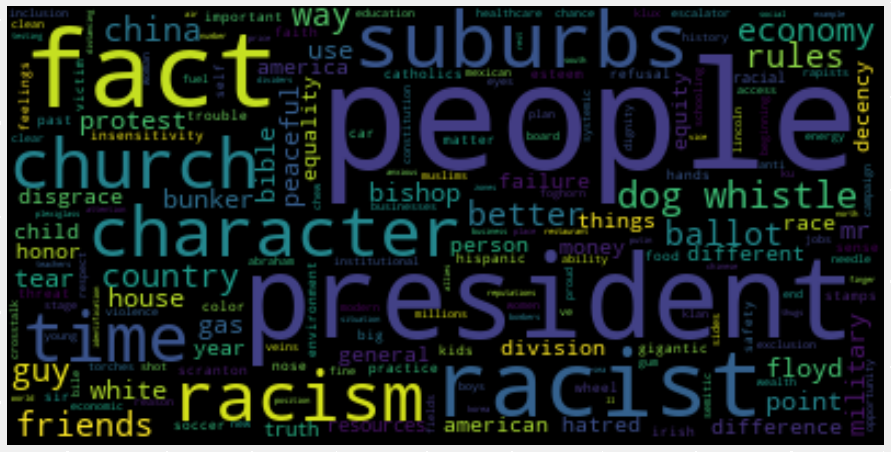

In [70]:
word_list = biden_racism_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

And for trump...

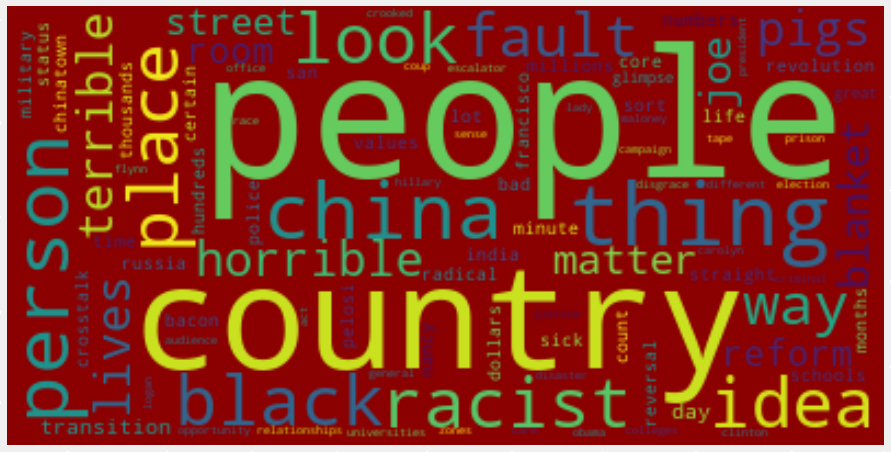

In [71]:
word_list = trump_racism_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

Let's finally plot the bubble plot for racism POS-Tags...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


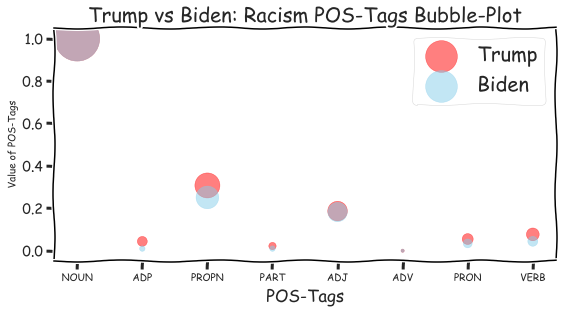

In [72]:
sns.set_style('ticks')
plt.xkcd()
title = 'Racism'
plot_bubble_plot(trump_racism_df, biden_racism_df, title)

<h3>QUEST 3:Trump and Biden sentiments and key phrases on the Economy</h3>

For trump on the Economy

In [73]:
word_list = ['economy']
corpus = trump_total_raw_corpus

trump_econs_df, trump_econs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [74]:
len(trump_econs_df)

44

In [75]:
trump_econs_df.head(20)

Sentence Sentiment  \
0                let me just tell you something, joe.   neutral   
1   if you would have had the charge of what i was...  positive   
2   and by the way, now it’s being built again and...  positive   
3      we closed it down because of the china plague.  negative   
4   when the plague came in, we closed it down, wh...  negative   
5   he didn’t think we should close it down and he...  negative   
6   again, two million people would be dead now in...  negative   
7                             one person is too much.  negative   
8              should have never happened from china.   neutral   
9   but what happened is we closed it down and now...   neutral   
10  we had 10.4 million people in a four month per...   neutral   
11  that’s a record the likes of which nobody’s ev...  positive   
12  and he wants to close down the… he will shut i...   neutral   
13  he will destroy this country.our economy boome...  negative   
14  and that’s despite the impeachment hoax and yo...  negative   
15  but despite going through all of these things ...  negative   
16  the greatest, before covid came in the greates...  positive   
17  everything was going.so as you know, 2.2 milli...  negative   
18  we closed up the greatest economy in the world...  negative   
19                         it’s a worldwide pandemic.   neutral   

                                          Key-phrases  
0                                                 joe  
1        [greatest economy, history, country, charge]  
2                    [greatest economy, history, way]  
3                                      [china plague]  
4                                            [plague]  
5                                                  []  
6                                            [people]  
7                                            [person]  
8                                             [china]  
9                                   [record business]  
10                  [people, month period, workforce]  
11                                    [record, likes]  
12                                                 []  
13  [period, president, i’ve, half years, administ...  
14           [impeachment hoax, hillary clinton, job]  
15      [fight, things, flanks, administration, i’ve]  
16  [greatest economy, lowest unemployment numbers...  
17                                           [people]  
18  [order, world, horrible disease, greatest econ...  
19                               [worldwide pandemic]

In [76]:
trump_econs_sentiments

{'Positive': [0.16], 'Neutral': [0.04], 'Negative': [0.8]}

For Biden on Economy...

In [77]:
word_list = ['economy']
corpus = biden_total_raw_corpus

biden_econs_df, biden_econs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [78]:
len(biden_econs_df)

56

In [79]:
biden_econs_df.head(20)

Sentence Sentiment  \
0   and there was no one … we didn’t shut down the...   neutral   
1                   this is his economy he shut down.   neutral   
2   the reason it’s shut down is because, look, yo...   neutral   
3   how many of you got up this morning and had an...  negative   
4   how many of you are in a situation where you l...  negative   
5   those people who have been saving our lives, t...  positive   
6   people who’ve been putting themselves in the w...   neutral   
7   and the idea that he is insisting that we go f...  negative   
8                       why is he want to open it up?   neutral   
9   why does he take care of the… you can’t fix th...  negative   
10  and he has no intention of doing anything abou...  negative   
11                      i was asked to bring it back.   neutral   
12  we were able to have an economic recovery that...   neutral   
13  we handed him a booming economy, he blew it.un...  negative   
14  when i was vice president, we inherited a rece...   neutral   
15                             i was asked to fix it.  positive   
16                                             i did.   neutral   
17  we left him a booming economy and he caused th...   neutral   
18  with regard to being weaker, the fact is that ...  negative   
19                                he’s putin’s puppy.   neutral   

                                          Key-phrases  
0                                             economy  
1                                           [economy]  
2                               [folks, home, reason]  
3              [chair, kitchen table, covid, morning]  
4   [people, mom, phone, fact, goodbye, jobs, situ...  
5                                     [people, lives]  
6                                       [way, people]  
7   [covid cases, covid deaths, united states of a...  
8                                                  []  
9                       [economy, covid crisis, care]  
10  [depression, worst recession, health, american...  
11                                                 []  
12                          [economic recovery, jobs]  
13                       [president, booming economy]  
14                        [vice president, recession]  
15                                                 []  
16                                                 []  
17                       [booming economy, recession]  
18           [head, i’ve, fact, putin, regard, stuff]  
19                                    [putin’s puppy]

In [80]:
biden_econs_sentiments

{'Positive': [0.45], 'Neutral': [0.05], 'Negative': [0.5]}

Let's see the sentiments analysis plot for Economy...

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

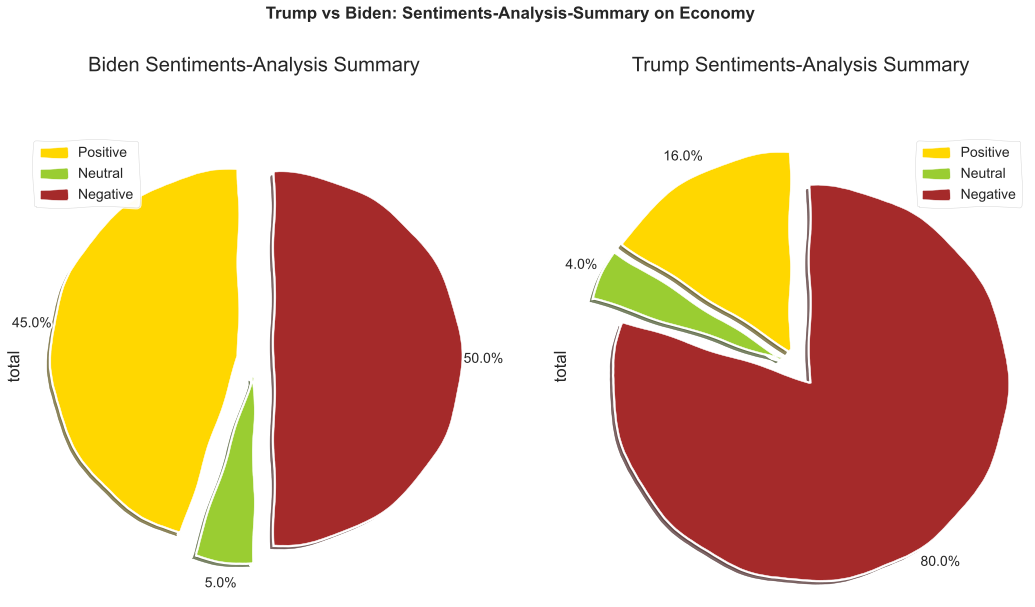

In [81]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Economy'
plt.xkcd()

plot_sentiments(biden_econs_sentiments, trump_econs_sentiments, title, colours)

Let's see Joe Bidens word-cloud of Key-Phrases he used when addressing the US Economy

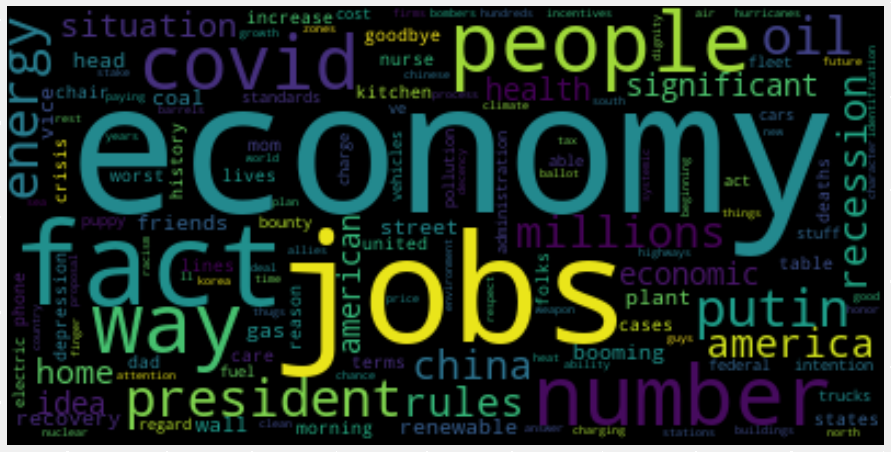

In [82]:
word_list = biden_econs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

And for Trump on the Economy...

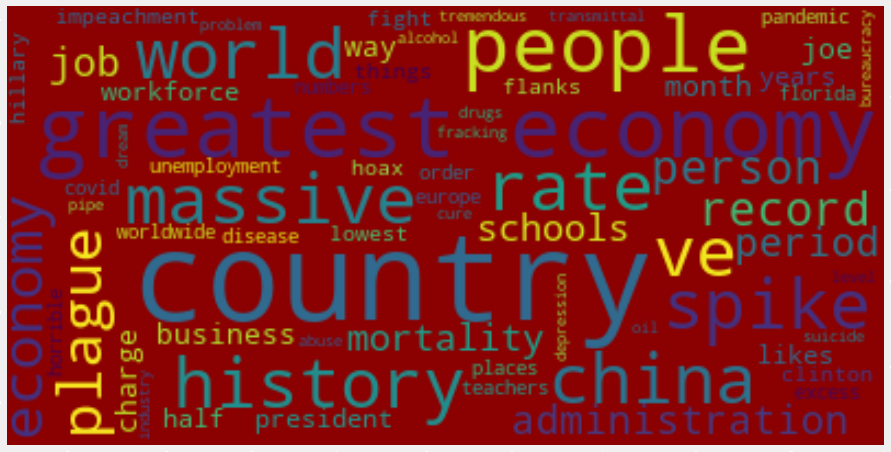

In [83]:
word_list = trump_econs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

Finally, let's see the distribution of Parts-Of-Speech tags as both Trump and Biden address the Economy...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


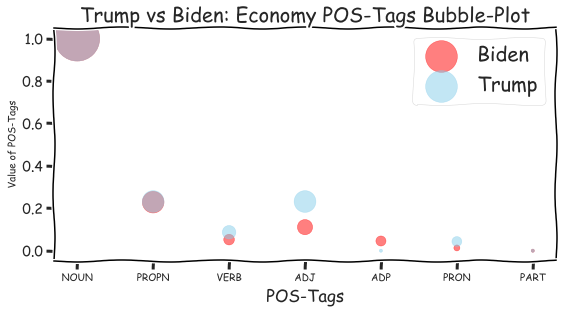

In [84]:
sns.set_style('ticks')
plt.xkcd()
title = 'Economy'
plot_bubble_plot(trump_econs_df, biden_econs_df, title)

<h3>QUEST 4:Trump and Biden sentiments and key phrases on COVID19 and Health.</h3>

For Trump on COVID19 and Health-Care

In [85]:
word_list = ['covid', 'pandemic','vaccine', 'virus', 'health', 'care',' dr',' doc']
corpus = trump_total_raw_corpus

trump_covid_df, trump_covid_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [86]:
len(trump_covid_df)

337

In [87]:
trump_covid_df.head(20)

Sentence Sentiment  \
0   when covid came along.because there is never b...   neutral   
1   and that’s despite the impeachment hoax and yo...  negative   
2   but despite going through all of these things ...  negative   
3   the greatest, before covid came in the greates...  positive   
4   everything was going.the bill that was passed ...  negative   
5   it was a way of getting a lot of money, billio...  negative   
6   it was also a way of getting a lot of money fr...  negative   
7   we were going to take care of everything for t...  positive   
8                            and i’d love to do that.  positive   
9                              i’d love to help them.  positive   
10  but what that does, everybody all over the wor...   neutral   
11                                    we can’t do it.   neutral   
12             this was a way of taking care of them.  positive   
13  this was a way of spending on things that had ...   neutral   
14  but it was really a big bailout for badly run ...  negative   
15  we closed up the greatest economy in the world...  negative   
16                         it’s a worldwide pandemic.   neutral   
17                           it’s all over the world.   neutral   
18  you see the spikes in europe and many other pl...   neutral   
19     if you notice, the mortality rate is down 85%.   neutral   

                                          Key-phrases  
0   period, president, i’ve, half years, administr...  
1            [impeachment hoax, hillary clinton, job]  
2       [fight, things, flanks, administration, i’ve]  
3   [greatest economy, lowest unemployment numbers...  
4   [democrat cities, bailout, high crime, house, ...  
5      [billions of dollars, lot of money, way, guys]  
6      [lot of money, people’s pockets, way, country]  
7                                              [care]  
8                                          [i’d love]  
9                                          [i’d love]  
10                                   [world, country]  
11                                                 []  
12                                        [way, care]  
13         [way of spending, things, covid, question]  
14             [big bailout, democrat cities, people]  
15  [order, world, horrible disease, greatest econ...  
16                               [worldwide pandemic]  
17                                            [world]  
18                           [spikes, europe, places]  
19                                   [mortality rate]

In [88]:
trump_covid_sentiments

{'Positive': [0.428], 'Neutral': [0.043], 'Negative': [0.528]}

For Biden on COVID19...

In [89]:
corpus = biden_total_raw_corpus

biden_covid_df, biden_covid_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [90]:
len(biden_covid_df)

434

In [91]:
biden_covid_df.tail(20)

Sentence Sentiment  \
414  over 20,000 of them are first responders out t...  negative   
415                                       we owe them.   neutral   
416  we owe them.we commuted over 1,000 people’s se...   neutral   
417  and secondly, we’re in a situation here where ...  negative   
418  and one of those things we should be doing, th...   neutral   
419  that’s why i’m offering $20 billion to states ...   neutral   
420  no one should be going to jail because they ha...  negative   
421  they should be going to rehabilitation, not to...   neutral   
422  we should fundamentally change the system and ...  negative   
423  i’ve been trying to change since then particul...   neutral   
424  that’s why i’ve been arguing that in fact we s...  negative   
425  and that’s why i set up drug courts which were...  negative   
426  they should not be going to jail for a drug or...  negative   
427  that’s what we’ve been trying to do, that’s wh...  negative   
428  when my mom get in the car and when there are ...   neutral   
429  that’s why so many people in my state were dyi...  negative   
430  the fact is those frontline communities, it’s ...   neutral   
431                 it matters how you keep them safe.  positive   
432                                    what do you do?   neutral   
433  you impose restrictions on the pollutions that...   neutral   

                                           Key-phrases  
414               [care of people, responders, crisis]  
415                                                 []  
416      [law, fact, barack obama, people’s sentences]  
417  [federal prison system, people, situation, adm...  
418                 [minimum mandatories, law, things]  
419  [minimum mandatories, state laws, drug courts,...  
420                                     [drug problem]  
421                                   [rehabilitation]  
422  [drugs, senators, i’m, percent, bill, system, ...  
423                           [portion, cocaine, i’ve]  
424  [pure drug offense, i’ve, fact, treatment, boa...  
425                  [drug courts, republican friends]  
426                 [drug, alcohol problem, treatment]  
427  [delaware river, marcus hook, oil refineries, ...  
428  [oil slick, windshield wiper, school, car, fro...  
429                            [state, people, cancer]  
430              [frontline communities, fact, matter]  
431                                                 []  
432                                                 []  
433  [pollutants, fence line communities, pollution...

In [92]:
biden_covid_sentiments

{'Positive': [0.319], 'Neutral': [0.052], 'Negative': [0.629]}

And the sentiments analysis plot for COVID

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

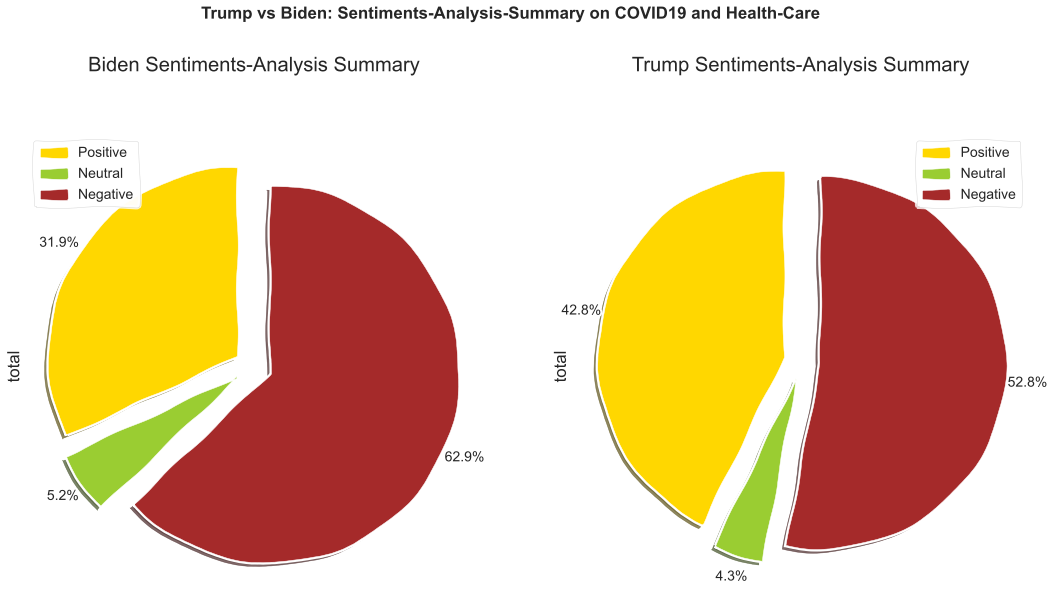

In [93]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'COVID19 and Health-Care'
plt.xkcd()
plot_sentiments(biden_covid_sentiments, trump_covid_sentiments, title, colours)

Let's see the word-cloud objects for Key-phrases spoken Trump as he addresses the Pandemic...

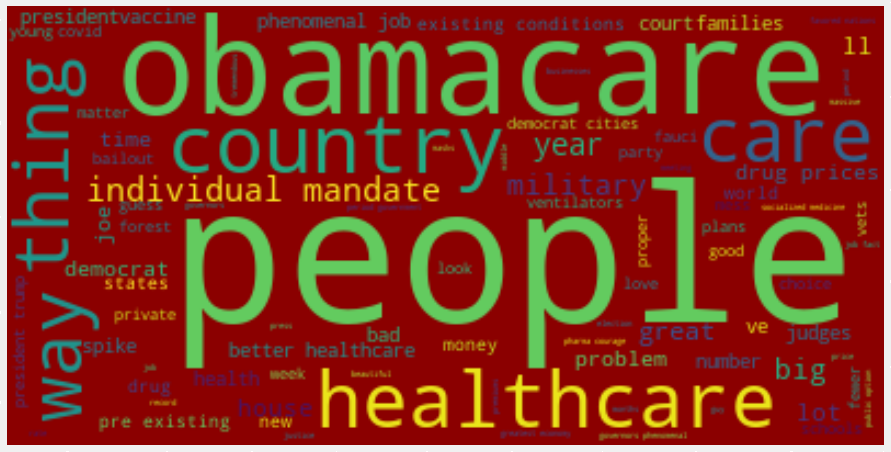

In [94]:
word_list = trump_covid_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

And for Biden's Key-phrases on COVID19...

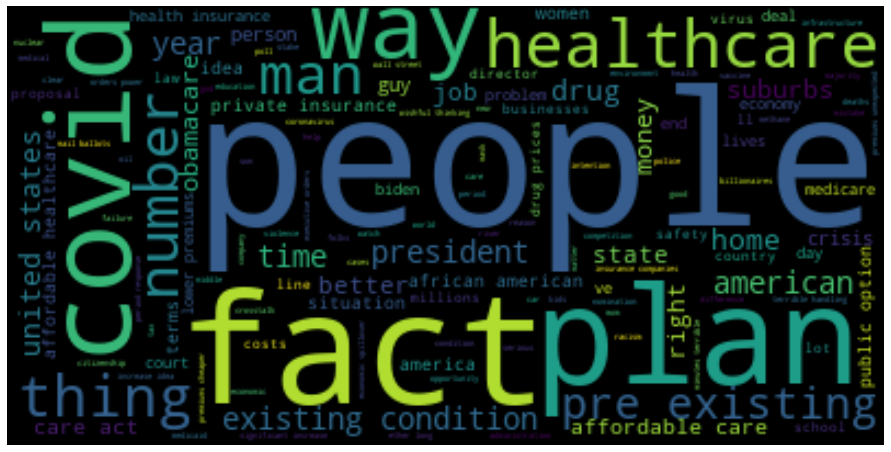

In [95]:
word_list = biden_covid_df['Key-phrases']
plt.style.use('seaborn')
color = 'black'
plot_word_cloud(word_list, color)

And now for the POS-Tags distribution

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


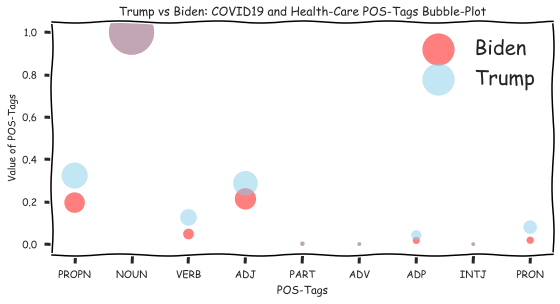

In [96]:
sns.set_style('ticks')
plt.xkcd()
title = 'COVID19 and Health-Care'
plot_bubble_plot(trump_covid_df, biden_covid_df, title)

<h3>QUEST 5:Trump and Biden sentiments and key phrases on the People of America...</h3>

For trump on the Residents and Citizens of America...

In [97]:
word_list = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']
corpus = trump_total_raw_corpus

trump_people_df, trump_people_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [98]:
len(trump_people_df)

171

In [99]:
trump_people_df.head(20)

Sentence Sentiment  \
0   you did a crime bill, 1994, where you call the...  negative   
1   african-americans are super predators and they...   neutral   
2   they’ve never forgotten it.so you did that and...  negative   
3   you did the 1990… and that’s why, if you look ...  positive   
4   you call them super predators, and you’ve call...  negative   
5   because you look back at your testimony over t...  negative   
6   as far as the church is concerned and as far a...  positive   
7   law enforcement, almost every law enforcement ...   neutral   
8                                     i have florida.   neutral   
9                                       i have texas.   neutral   
10                                       i have ohio.   neutral   
11  i have every… excuse me, portland, the sheriff...  negative   
12  and every time you raise money deals are made,...   neutral   
13                  i could raise so much more money.   neutral   
14  as president, and as somebody that knows most ...   neutral   
15                    i would blow away every record.   neutral   
16  but i don’t want to do that because it puts me...  negative   
17                 and then you bring up wall street?   neutral   
18  you shouldn’t be bringing up wall street, beca...   neutral   
19  i could blow away your records like you wouldn...   neutral   

                                          Key-phrases  
0                         crime bill, super predators  
1                [african-americans, super predators]  
2   [black community, african-american population ...  
3                 [republican, i’m, long time, polls]  
4                                   [super predators]  
5                       [years, lot worse, testimony]  
6   [generals, total support, military leaders, ch...  
7              [law enforcement group, united states]  
8                                           [florida]  
9                                             [texas]  
10                                             [ohio]  
11  [lot of money, tremendous amounts of money, jo...  
12                           [money deals, time, joe]  
13                                            [money]  
14  [heads of wall street, company, people, americ...  
15                                           [record]  
16                                     [bad position]  
17                                      [wall street]  
18                               [wall street, money]  
19                                          [records]

In [100]:
trump_people_sentiments

{'Positive': [0.41], 'Neutral': [0.028], 'Negative': [0.562]}

For Biden on the People...

In [101]:
word_list = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']
corpus = biden_total_raw_corpus

biden_people_df, biden_people_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [102]:
len(biden_people_df)

322

In [103]:
biden_people_df.head(20)

Sentence Sentiment  \
0                     because we made a mistake made.  negative   
1                   it took too long to get it right.  positive   
2                      took too long to get it right.  negative   
3   i’ll be president of the united states, not vi...   neutral   
4            and the fact is i’ve made it very clear.   neutral   
5   within a 100 days, i’m going to send to the un...   neutral   
6   and all of those so-called dreamers, those dac...   neutral   
7   the idea that they are being sent home by this...  negative   
8                                      i can imagine.   neutral   
9                              you’re five years old.   neutral   
10  your parents are taking across the rio grande ...  negative   
11                         and you say, “oh, no, mom.   neutral   
12                                     leave me here.   neutral   
13     i’m not going to go with you.” they been here.   neutral   
14                   many of them are model citizens.   neutral   
15  over 20,000 of them are first responders out t...  negative   
16                                       we owe them.   neutral   
17  we owe them.the american people have a right t...  positive   
18  they’re not going to get that chance now becau...   neutral   
19                  the election has already started.   neutral   

                                          Key-phrases  
0                                             mistake  
1                                                  []  
2                                                  []  
3               [united states, vice president, i’ll]  
4                                        [fact, i’ve]  
5   [citizenship, united states, pathway, i’m, und...  
6   [so-called dreamers, daca kids, country, path,...  
7                                   [home, idea, guy]  
8                                                  []  
9                                         [years old]  
10                        [rio grande river, parents]  
11                                              [mom]  
12                                                 []  
13                                              [i’m]  
14                                   [model citizens]  
15               [care of people, responders, crisis]  
16                                                 []  
17  [say, united states senators, president of uni...  
18                         [middle, chance, election]  
19                                         [election]

In [104]:
biden_people_sentiments

{'Positive': [0.187], 'Neutral': [0.039], 'Negative': [0.774]}

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

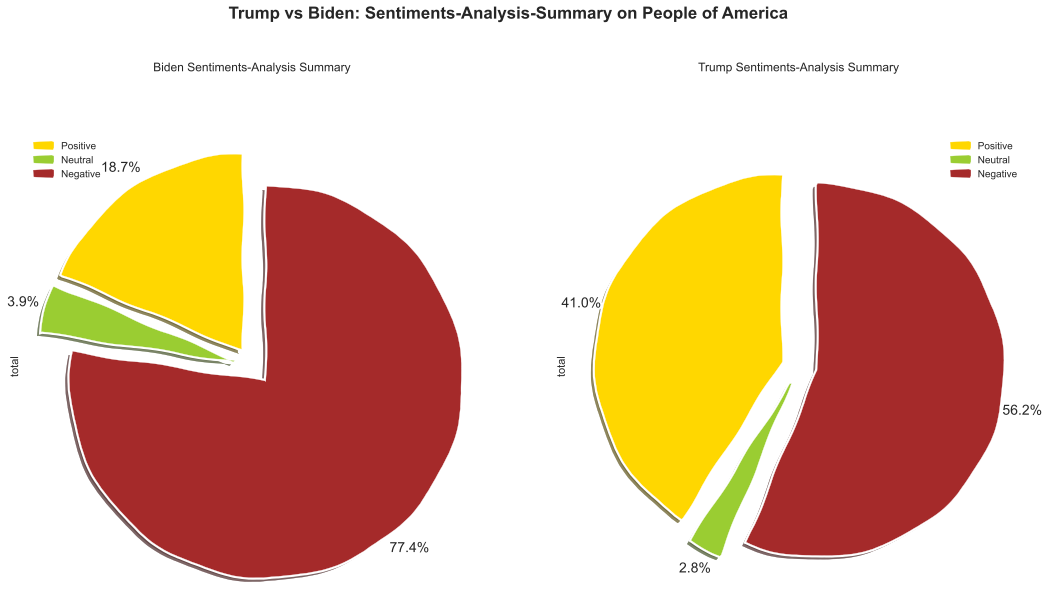

In [105]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'People of America'
plot_sentiments(biden_people_sentiments, trump_people_sentiments, title, colours)

Let's see the Key-phrases for Trump...

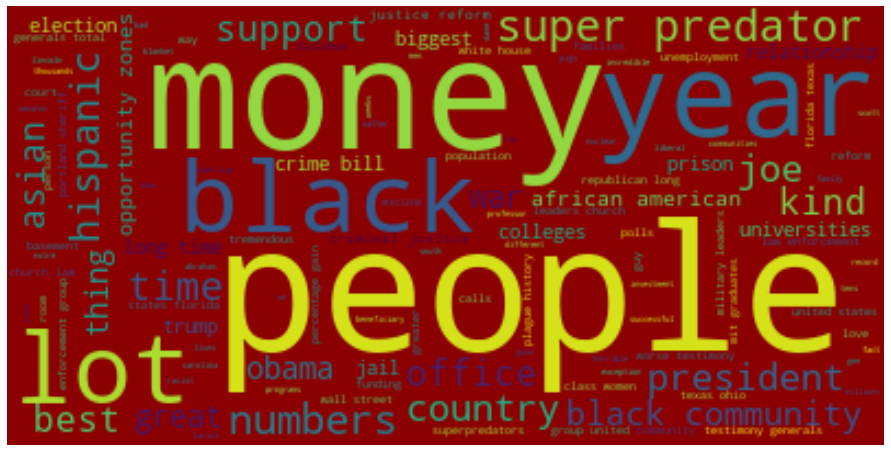

In [106]:
word_list = trump_people_df['Key-phrases']
plt.style.use('seaborn')
color = 'darkred'
plot_word_cloud(word_list, color)

And for Biden on the People...

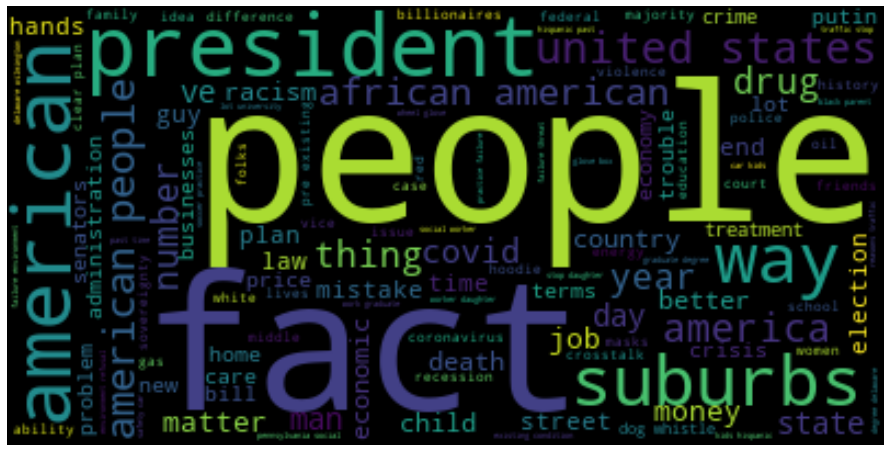

In [107]:
word_list = biden_people_df['Key-phrases']
plt.style.use('seaborn')
color = 'black'
plot_word_cloud(word_list, color)

Finally, let's see the POS-Tags distribution bubble-plot for Trump and Biden on the American People...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


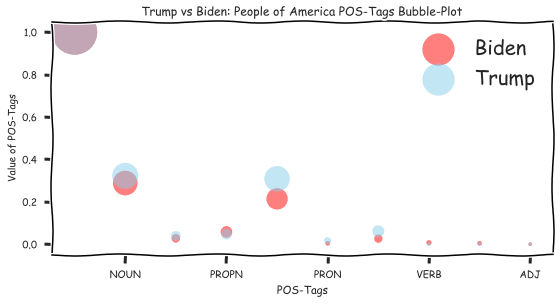

In [108]:
sns.set_style('ticks')
plt.xkcd()
title = 'People of America'
plot_bubble_plot(trump_people_df, biden_people_df, title)

<h2>Bayesian Inference on common search-queries for Trump and Biden</h2>

So, our task here is to find the conditional probability of Trump and Biden mentioning the words we care most about from the five questions word-list above.<br>
We will build a naive-bayes classifier from scratch and use it to tell the conditional likelihood of Trump and Biden given the words we care most about.

<h3>Bayes Theory Formula</h3>

<h3>$P(A|B)$ = ${P(B|A) * P(A)}\over{PB}$</h3>

Let's define the Prior. So what do we know, we know that both Trump and Biden had a 50-50 chance of participating at these debates. The venue, time and logistics were made to accommodate both Trump and Biden and they both were debating under the same set of normal circumstances, at the same time, place and date... Therefore<br>
$P$ of Trump speech for debates 1 and 2 = 0.5<br>
$P$ of Biden speech for debates 1 and 2 = 0.5<br>

In [109]:
p_trump_speech = 0.5
p_biden_speech = 0.5

print(f'P of Trump-Speech is {p_trump_speech}, P of Biden-Speech is {p_biden_speech}')
print(f'Sum of p-trump-speech and p-biden-speech is {p_trump_speech + p_biden_speech}.')

P of Trump-Speech is 0.5, P of Biden-Speech is 0.5
Sum of p-trump-speech and p-biden-speech is 1.0.


Therefore, we can see that Trump has a 60% chance of talking in the debate, while Biden has a 40% chance.<br>
Now, let's process the word-list we care about. We get these from the 5 queries above.

In [110]:
words1 = ['job', 'wage', 'tax']
words2 = ['raci','race']
words3 = ['economy']
words4 = ['covid', 'pandemic','vaccine', 'virus', 'health', 'care','dr','doc']
words5 = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']

Let's combine all these lists 

In [111]:
words = [words1, words2, words3, words4, words5]
query_list = []
for word in words:
    query_list.extend(word)
    
query_list

['job',
 'wage',
 'tax',
 'raci',
 'race',
 'economy',
 'covid',
 'pandemic',
 'vaccine',
 'virus',
 'health',
 'care',
 'dr',
 'doc',
 'citizen',
 'america',
 'black',
 'african',
 'white',
 'latin',
 'hispanic',
 'asian',
 'minorit',
 'immigra']

Now let's find the Probability of Trump and Biden saying these words

In [112]:
def probability_queries(query_list, trump_total_words, biden_total_words):
    
    # First make all words lower-case
    trump_total_words = [i.lower() for i in trump_total_words]
    biden_total_words = [j.lower() for j in biden_total_words]
    
    # Next, initialise a DataFrame to store findings
    df = pd.DataFrame(index=query_list, columns=['P-Trump', 'P-Biden'])
    # Next fill the columns with zeros
    df['P-Trump'], df['P-Biden'] = 0, 0
    
    # Next use Counter() to get a dict of word:count pairs
    tokenized_trump_dict = dict(Counter(trump_total_words))
    tokenized_biden_dict = dict(Counter(biden_total_words))

    for word in query_list:
        # For Trump
        for key, val in tokenized_trump_dict.items():
            if word in key:
                if df.loc[word, 'P-Trump'] == 0:
                    df.loc[word, 'P-Trump'] = val
                else:
                    df.loc[word, 'P-Trump'] += val
                    
         # For Biden           
        for key, val in tokenized_biden_dict.items():
            if word in key:
                if df.loc[word, 'P-Biden'] == 0:
                    df.loc[word, 'P-Biden'] = val
                else:
                    df.loc[word, 'P-Biden'] += val
                    
    # now we compute the ratios for each query word for Trump and Biden   
    df['P-Trump'] /= sum(tokenized_trump_dict.values())
    df['P-Biden'] /= sum(tokenized_biden_dict.values())
    return df 

In [113]:
queries_df = probability_queries(query_list, trump_total_words, biden_total_words)

In [114]:
queries_df

P-Trump   P-Biden
job       0.002498  0.003906
wage      0.000217  0.000504
tax       0.001737  0.003654
raci      0.000760  0.001260
race      0.000217  0.000630
economy   0.000869  0.001764
covid     0.000326  0.001764
pandemic  0.000217  0.000000
vaccine   0.000760  0.000882
virus     0.000000  0.000630
health    0.001629  0.002520
care      0.004887  0.005292
dr        0.002932  0.003150
doc       0.000217  0.000126
citizen   0.000000  0.000378
america   0.000543  0.006678
black     0.001629  0.000378
african   0.000217  0.000756
white     0.000326  0.000504
latin     0.000000  0.000378
hispanic  0.000326  0.000126
asian     0.000217  0.000000
minorit   0.000000  0.000000
immigra   0.000109  0.000000

Now, let's normalise these really small probabilities by first scaling each one up by 10000 and dividing each by the sum of each respective column. We do this equally for both Trump and Biden

In [115]:
queries_df['P-Trump'] = queries_df['P-Trump'] * 10000
queries_df['P-Biden'] = queries_df['P-Biden'] * 10000

# Let's see the queries
queries_df

P-Trump    P-Biden
job       24.975567  39.062500
wage       2.171788   5.040323
tax       17.374308  36.542339
raci       7.601260  12.600806
race       2.171788   6.300403
economy    8.687154  17.641129
covid      3.257683  17.641129
pandemic   2.171788   0.000000
vaccine    7.601260   8.820565
virus      0.000000   6.300403
health    16.288414  25.201613
care      48.865241  52.923387
dr        29.319144  31.502016
doc        2.171788   1.260081
citizen    0.000000   3.780242
america    5.429471  66.784274
black     16.288414   3.780242
african    2.171788   7.560484
white      3.257683   5.040323
latin      0.000000   3.780242
hispanic   3.257683   1.260081
asian      2.171788   0.000000
minorit    0.000000   0.000000
immigra    1.085894   0.000000

Now let's normalize by dividing each value by the sum of each column for both Trump and Biden

In [116]:
queries_df.loc[:,'P-Trump'] = round(queries_df.loc[:,'P-Trump'] / sum(queries_df['P-Trump']),3)
queries_df.loc[:,'P-Biden'] = round(queries_df.loc[:,'P-Biden'] / sum(queries_df['P-Biden']),3)

In [117]:
queries_df

P-Trump  P-Biden
job         0.121    0.111
wage        0.011    0.014
tax         0.084    0.104
raci        0.037    0.036
race        0.011    0.018
economy     0.042    0.050
covid       0.016    0.050
pandemic    0.011    0.000
vaccine     0.037    0.025
virus       0.000    0.018
health      0.079    0.071
care        0.237    0.150
dr          0.142    0.089
doc         0.011    0.004
citizen     0.000    0.011
america     0.026    0.189
black       0.079    0.011
african     0.011    0.021
white       0.016    0.014
latin       0.000    0.011
hispanic    0.016    0.004
asian       0.011    0.000
minorit     0.000    0.000
immigra     0.005    0.000

In [118]:
sum(queries_df['P-Trump'])

1.003

In [119]:
sum(queries_df['P-Biden'])

1.001

They are each equal to one (roundable), so we can continue

Now that we know the $P$ of Trump's speech (0.6) and $P$ of Biden's speech (0.4) and we know the respective $P$ of each query-word being said, given Trump and Biden individually...$(P(each-query-word|Trump)$ and $(P(each-query-word|Biden)$. It is time to find the $P$ of both men given each of these words being said, that is:- $P(Trump|each-query-word)$ and $P(Biden|each-query-word)$. We use Bayes rule for this...<br> In other words, Given that the query words were said, what's the probability that they were said by Trump and Biden?

Therefore, using bayes Rule For Trump...
<h3>$P(Trump|each-query-word)$ = ${P(each-query-word|Trump) * P(Trump)} \over P(each-query-word)$</h3>

Let's as usual define a method to calculate the bayes inference

In [120]:
def calc_bayes_inference(queries_df, p_t_speech, p_b_speech):
    # For each query word given Trump
    
    # Now while doing this multiplication, any value which is exactly 0 must be avoided.
    # If the P of a word is 0, it simply means the word was not said, so we ignore it.
    
    p_each_query_given_trump = 1
    for i in list(queries_df['P-Trump']):
        if i == 0:
            continue
        p_each_query_given_trump *= i
        
    # For each query word given Biden
    # We use the same approach as for Trump
    
    p_each_query_given_biden = 1
    for i in list(queries_df['P-Biden']):
        if i == 0:
            continue
        p_each_query_given_biden *= i
    
    # Next we compute P of each query word
    # This is the total probability of each-query-word
    # occurring, given both Trump and Biden.
    # We use a simple trick like so...
    p_each_query = (p_each_query_given_trump * p_t_speech) + (p_each_query_given_biden * p_b_speech)
    
    # Next to find P of Trump given each query, we do...
    p_trump_given_each_query = round((p_each_query_given_trump * p_t_speech) / p_each_query,4)
    
    # And to find P of Biden given each query, we do...
    p_biden_given_each_query = round((p_each_query_given_biden * p_b_speech) / p_each_query, 4)
        
    return p_trump_given_each_query, p_biden_given_each_query

In [121]:
p_t_speech = p_trump_speech
p_b_speech = p_biden_speech

# Therefore...
p_trump_given_each_query, p_biden_given_each_query = calc_bayes_inference(queries_df, p_t_speech, p_b_speech)

In [123]:
p_trump_given_each_query

0.467

In [124]:
p_biden_given_each_query

0.533

So from this exercise and given the topics we care about, who's most likely to discuss them, hopefully address them and proffer solutions... Bayes Rule says Biden is likely, and the margin is tight **53% : 47%** in favour of _Joe Biden_...
This is by no means a prediction of the election or a means to influence voter decisions, it's just my opinion inferred solely from the Presidential debates.<br>
But ofcouse we know that there's more to life, to America than just two debates.
Cheers!!

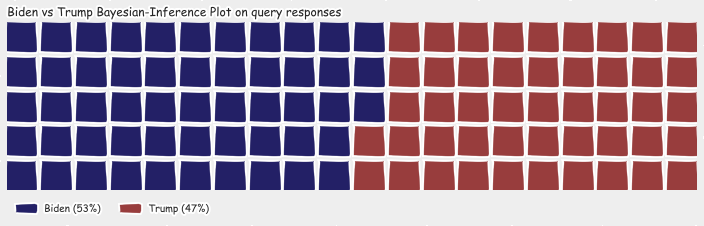

In [148]:
data = {'Biden': round(p_biden_given_each_query * 100), 'Trump': round(p_trump_given_each_query * 100)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    font_size=14,
    values=data, 
    colors=["#232066", "#983D3D"],
    title={'label': 'Biden vs Trump Bayesian-Inference Plot on query responses', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    block_arranging_style='snake',
    figsize=(10,10)
)
fig.set_facecolor('#EEEEEE')
plt.show()